## **1. Loading and Checking Dataset**

In [1]:
# importing core libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset

df = pd.read_csv("in-vehicle-coupon-recommendation.csv")
pd.set_option("display.max_columns", None)
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
# checking key information about the dataset

print(f"Number of rows (observations) in the input dataset: {df.shape[0]}")
print(f"Number of columns (variables) in the input dataset: {df.shape[1]}")

Number of rows (observations) in the input dataset: 12684
Number of columns (variables) in the input dataset: 26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

## **2. Preliminary Data Preprocessing**

In [5]:
# number of missing values for each feature

df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
# percentage of missing values for each feature

missing_percent = df.isna().mean()*100
missing_percent.sort_values(ascending=False)

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
destination              0.000000
passanger                0.000000
direction_opp            0.000000
direction_same           0.000000
toCoupon_GEQ25min        0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ5min         0.000000
income                   0.000000
occupation               0.000000
education                0.000000
has_children             0.000000
maritalStatus            0.000000
age                      0.000000
gender                   0.000000
expiration               0.000000
coupon                   0.000000
time                     0.000000
temperature              0.000000
weather                  0.000000
Y                        0.000000
dtype: float64

In [7]:
# The feature "car" contains missing values for most observations, and is therefore useless for further analysis. 

df = df.drop("car", axis=1)

In [8]:
# The remaining features with missing data are of the "object" type.
# For each of them, missing values might be imputed using the mode. 
# However, as these values account for less than 2% of all observations for each feature, they were removed.

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

###  In total, **about 5%** of all initial observations were removed, which can be considered an acceptable fraction, especially when scattered across different features (as in the case here).

In [9]:
# number of unique values for each feature

df.nunique().sort_values()

toCoupon_GEQ5min         1
Y                        2
direction_same           2
toCoupon_GEQ25min        2
toCoupon_GEQ15min        2
direction_opp            2
expiration               2
gender                   2
has_children             2
destination              3
temperature              3
weather                  3
passanger                4
coupon                   5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
time                     5
maritalStatus            5
education                6
age                      8
income                   9
occupation              25
dtype: int64

In [10]:
# The feature "toCoupon_GEQ5min" contains only 1 unique value, hence it doesn't provide any relevant information for the analysis 

df = df.drop("toCoupon_GEQ5min", axis = 1)

In [11]:
# The feature "occupation" has 25 unique values.
# It is reasonable to group them to obtain a smaller number of categories that are also more numerous.

df["occupation"].value_counts(normalize=True)

occupation
Unemployed                                   0.150178
Student                                      0.123934
Computer & Mathematical                      0.113254
Sales & Related                              0.088749
Education&Training&Library                   0.070784
Management                                   0.063913
Office & Administrative Support              0.051080
Arts Design Entertainment Sports & Media     0.046693
Business & Financial                         0.042719
Retired                                      0.039159
Food Preparation & Serving Related           0.022850
Healthcare Support                           0.020035
Healthcare Practitioners & Technical         0.018379
Legal                                        0.018131
Community & Social Services                  0.018131
Transportation & Material Moving             0.018048
Protective Service                           0.014488
Architecture & Engineering                   0.014488
Life Physical Soc

In [12]:
# The grouping was made based on a subjective assessment of the similarities between the individual occupations.

occupation_map = {
    "Unemployed": "Unemployed",
    "Student": "Student",
    "Computer & Mathematical": "Tech_Eng",
    "Sales & Related": "Business_Services",
    "Education&Training&Library": "Social_Edu",
    "Management": "Business_Services",
    "Office & Administrative Support": "Business_Services",
    "Arts Design Entertainment Sports & Media": "Business_Services",
    "Business & Financial": "Business_Services",
    "Retired": "Retired",
    "Food Preparation & Serving Related": "Social_Edu",
    "Healthcare Support": "Social_Edu",
    "Healthcare Practitioners & Technical": "Tech_Eng",
    "Legal":"Business_Services",
    "Community & Social Services": "Social_Edu",
    "Transportation & Material Moving": "Physical", 
    "Protective Service": "Social_Edu",
    "Architecture & Engineering":"Tech_Eng",
    "Life Physical Social Science": "Social_Edu",
    "Construction & Extraction": "Physical",
    "Personal Care & Service":"Social_Edu",
    "Installation Maintenance & Repair":"Physical",
    "Production Occupations":"Physical",
    "Building & Grounds Cleaning & Maintenance":"Physical",
    "Farming Fishing & Forestry":"Physical"}

# New feature: "occupation_grouped"

df["occupation_grouped"] = df["occupation"].map(occupation_map)

In [13]:
df["occupation_grouped"].value_counts()

occupation_grouped
Business_Services    3760
Social_Edu           2090
Unemployed           1814
Tech_Eng             1765
Student              1497
Physical              680
Retired               473
Name: count, dtype: int64

In [14]:
print(df['toCoupon_GEQ15min'].value_counts())
print(df['toCoupon_GEQ25min'].value_counts())

toCoupon_GEQ15min
1    6779
0    5300
Name: count, dtype: int64
toCoupon_GEQ25min
0    10637
1     1442
Name: count, dtype: int64


In [15]:
# Features "toCoupon_GEQ15min" and "toCoupon_GEQ25min" carry similar information ('driving distance to the restaurant/bar/coffee'). 
# They can be combined into a single feature that will determine the time distance.

def distance(row):
    if row['toCoupon_GEQ15min'] == 0: 
        return 1
    elif row["toCoupon_GEQ15min"] == 1 and row['toCoupon_GEQ25min'] == 0:
        return 2
    else:
        return 3

# New feature: "toCoupon_distance"

df['toCoupon_distance'] = df.apply(distance, axis=1)

In [16]:
df['toCoupon_distance'].value_counts()

toCoupon_distance
2    5337
1    5300
3    1442
Name: count, dtype: int64

In [17]:
df["coupon"].value_counts()

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64

In [18]:
# Features "Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20" and "Restaurant20to50" describe the frequency of visits to the place for which the coupon was offered (how many times per month).

# They carry similar information and can be combined into a single feature that will determine the frequency of visits to the place for which the coupon was offered.

def visit_freq_coupon(row):
    if row['coupon'] == 'Coffee House':
        return row['CoffeeHouse']
    elif row['coupon'] == 'Bar':
        return row['Bar']
    elif row['coupon'] == 'Carry out & Take away':
        return row['CarryAway']
    elif row['coupon'] == 'Restaurant(<20)':
        return row['RestaurantLessThan20']
    elif row['coupon'] == 'Restaurant(20-50)':
        return row['Restaurant20To50']
    else:
        return np.nan

# New feature: "visit_freq"

df['visit_freq'] = df.apply(visit_freq_coupon, axis=1)

In [19]:
df['visit_freq'].value_counts()

visit_freq
1~3      3706
less1    3099
4~8      2294
never    1976
gt8      1004
Name: count, dtype: int64

In [20]:
visit_freq_map = {
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4,}

df['visit_freq'] = df['visit_freq'].map(visit_freq_map)

In [21]:
# deleting features from which new features were created and old ones will no longer be needed.

df = df.drop(["occupation", 'toCoupon_GEQ15min', 'toCoupon_GEQ25min','CoffeeHouse', 'CarryAway', 'Bar', 'RestaurantLessThan20', 'Restaurant20To50'], axis = 1)

In [22]:
# Features "directon_same" and "direction_opp" carry the same information (if one takes the value 1, the other takes the value 0), so one of them can be removed.

df = df.drop("direction_opp", axis = 1)

In [23]:
# some transformations for other features...

df['income'].value_counts()

income
$25000 - $37499     1919
$12500 - $24999     1728
$100000 or More     1692
$37500 - $49999     1689
$50000 - $62499     1565
Less than $12500    1014
$62500 - $74999      840
$87500 - $99999      818
$75000 - $87499      814
Name: count, dtype: int64

In [24]:
df.groupby('income')['Y'].mean().sort_values()

income
$75000 - $87499     0.492629
$87500 - $99999     0.523227
$62500 - $74999     0.527381
$37500 - $49999     0.570752
$12500 - $24999     0.577546
$100000 or More     0.578014
Less than $12500    0.587771
$50000 - $62499     0.589776
$25000 - $37499     0.597186
Name: Y, dtype: float64

In [25]:
# grouping values for the feature "income" (based on percentage shares of Y=1)

df['income'] = df['income'].replace({
    "Less than $12500": 1,
    "$12500 - $24999": 1,
    "$25000 - $37499": 1,
    "$37500 - $49999": 1,
    "$50000 - $62499": 1,
    "$62500 - $74999": 2,
    "$75000 - $87499": 2,
    "$87500 - $99999": 2,
    "$100000 or More": 3})

df['income'].value_counts()

/var/folders/mq/ckpznt291nn2xj9_5lp2btvw0000gn/T/ipykernel_2660/2679544233.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['income'] = df['income'].replace({


income
1    7915
2    2472
3    1692
Name: count, dtype: int64

In [26]:
df['age'].value_counts()

age
21         2537
26         2399
31         1925
50plus     1732
36         1253
41         1065
46          664
below21     504
Name: count, dtype: int64

In [27]:
df.groupby('age')['Y'].mean().sort_values()

age
50plus     0.507506
36         0.538707
31         0.552208
41         0.574648
46         0.576807
21         0.594009
26         0.599833
below21    0.632937
Name: Y, dtype: float64

In [28]:
# grouping values for the feature "age"

df['age'] = df['age'].replace({
    'below21': '>21',
    '21': '21-30',
    '26': '21-30',
    '31': '31-40',
    '36': '31-40',
    '41': '41-50',
    '46': '41-50',
    '50plus': '50+'})

In [29]:
df['maritalStatus'].value_counts()

maritalStatus
Married partner      4831
Single               4588
Unmarried partner    2048
Divorced              504
Widowed               108
Name: count, dtype: int64

In [30]:
df.groupby('maritalStatus')['Y'].mean().sort_values()

maritalStatus
Widowed              0.472222
Divorced             0.525794
Married partner      0.542952
Unmarried partner    0.555664
Single               0.610288
Name: Y, dtype: float64

In [31]:
# grouping values for the feature "maritalStatus"

df['maritalStatus'] = df['maritalStatus'].replace({
    'Widowed': 'Had_Partner',
    'Divorced': 'Had_Partner',
    'Married partner': 'Has_Partner',
    'Unmarried partner': 'Has_Partner',
    'Single': 'Single'})

In [32]:
df['education'].value_counts()

education
Some college - no degree                  4219
Bachelors degree                          4021
Graduate degree (Masters or Doctorate)    1808
Associates degree                         1066
High School Graduate                       877
Some High School                            88
Name: count, dtype: int64

In [33]:
df.groupby('education')['Y'].mean().sort_values()

education
Graduate degree (Masters or Doctorate)    0.526549
Bachelors degree                          0.556329
Associates degree                         0.559099
High School Graduate                      0.594071
Some college - no degree                  0.594454
Some High School                          0.715909
Name: Y, dtype: float64

In [34]:
df['education'] = df['education'].replace({
    'Some High School': 'Low',
    'High School Graduate': 'Low',
    'Associates degree': 'Mid',
    'Some college - no degree': 'Mid',
    'Bachelors degree': 'High',
    'Graduate degree (Masters or Doctorate)': 'High'})

df['education'].value_counts()

education
High    5829
Mid     5285
Low      965
Name: count, dtype: int64

In [35]:
df.nunique().sort_values()

Y                     2
direction_same        2
expiration            2
gender                2
has_children          2
destination           3
weather               3
temperature           3
toCoupon_distance     3
maritalStatus         3
education             3
income                3
passanger             4
age                   5
time                  5
coupon                5
visit_freq            5
occupation_grouped    7
dtype: int64

### **Duplicates**
### The analysis assumed that the data **did not contain duplicates** (so that two identical rows meant two different drivers).

## **3. Exploratory Data Analysis (EDA) & Further Data Preparation**

In [36]:
# checking the counts and proportions of Y=1 & Y=0 (target variable)

print(df['Y'].value_counts())
print(df['Y'].value_counts(normalize = True))

Y
1    6877
0    5202
Name: count, dtype: int64
Y
1    0.569335
0    0.430665
Name: proportion, dtype: float64


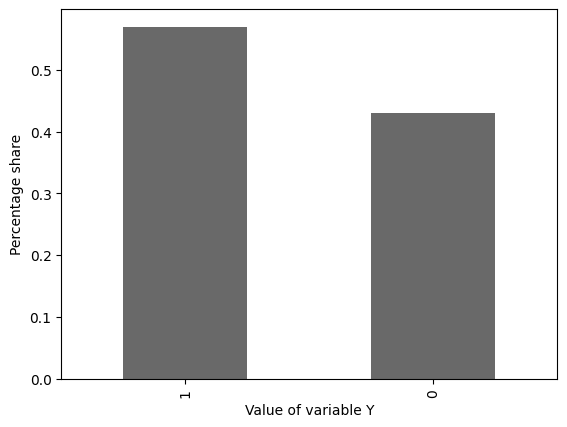

In [37]:
# plot - percentage share of target variable Y

df['Y'].value_counts(normalize=True).plot(kind="bar", color="dimgrey")
plt.xlabel("Value of variable Y")
plt.ylabel("Percentage share")

plt.show()

### The sample is **quite well balanced**. 
### There is no need to use balancing methods (such as oversampling/undersampling) in this case.

In [38]:
# The number of values within each category of different features (Y=1)

for col in df.columns:
    print(f"\n==== {col} (Y = 1) ====")
    print(df[df['Y'] == 1][col].value_counts())


==== destination (Y = 1) ====
destination
No Urgent Place    3785
Home               1568
Work               1524
Name: count, dtype: int64

==== passanger (Y = 1) ====
passanger
Alone        3673
Friend(s)    2129
Partner       609
Kid(s)        466
Name: count, dtype: int64

==== weather (Y = 1) ====
weather
Sunny    5713
Snowy     634
Rainy     530
Name: count, dtype: int64

==== temperature (Y = 1) ====
temperature
80    3731
55    1967
30    1179
Name: count, dtype: int64

==== time (Y = 1) ====
time
6PM     1794
7AM     1524
10AM    1312
2PM     1266
10PM     981
Name: count, dtype: int64

==== coupon (Y = 1) ====
coupon
Coffee House             1894
Restaurant(<20)          1881
Carry out & Take away    1682
Bar                       788
Restaurant(20-50)         632
Name: count, dtype: int64

==== expiration (Y = 1) ====
expiration
1d    4244
2h    2633
Name: count, dtype: int64

==== gender (Y = 1) ====
gender
Male      3483
Female    3394
Name: count, dtype: int64

==== age 

In [39]:
# The number of values within each category of different features (Y=0)

for col in df.columns:
    print(f"\n==== {col} (Y = 1) ====")
    print(df[df['Y'] == 0][col].value_counts())


==== destination (Y = 1) ====
destination
No Urgent Place    2185
Home               1517
Work               1500
Name: count, dtype: int64

==== passanger (Y = 1) ====
passanger
Alone        3296
Friend(s)    1019
Kid(s)        472
Partner       415
Name: count, dtype: int64

==== weather (Y = 1) ====
weather
Sunny    3888
Snowy     697
Rainy     617
Name: count, dtype: int64

==== temperature (Y = 1) ====
temperature
80    2491
55    1695
30    1016
Name: count, dtype: int64

==== time (Y = 1) ====
time
7AM     1500
6PM     1284
10PM     922
10AM     846
2PM      650
Name: count, dtype: int64

==== coupon (Y = 1) ====
coupon
Coffee House             1922
Bar                      1125
Restaurant(20-50)         785
Restaurant(<20)           772
Carry out & Take away     598
Name: count, dtype: int64

==== expiration (Y = 1) ====
expiration
2h    2686
1d    2516
Name: count, dtype: int64

==== gender (Y = 1) ====
gender
Female    2805
Male      2397
Name: count, dtype: int64

==== age 

### Each category of any individual feature contains  **at least +- 200-300** observations (for both Y=1 and Y=0).

### In this analysis, it was considered sufficient in terms of the **effectiveness of learning relationships and detecing trends**, and the ability of the subsequent estimated model to **generalize and avoid overfitting**.

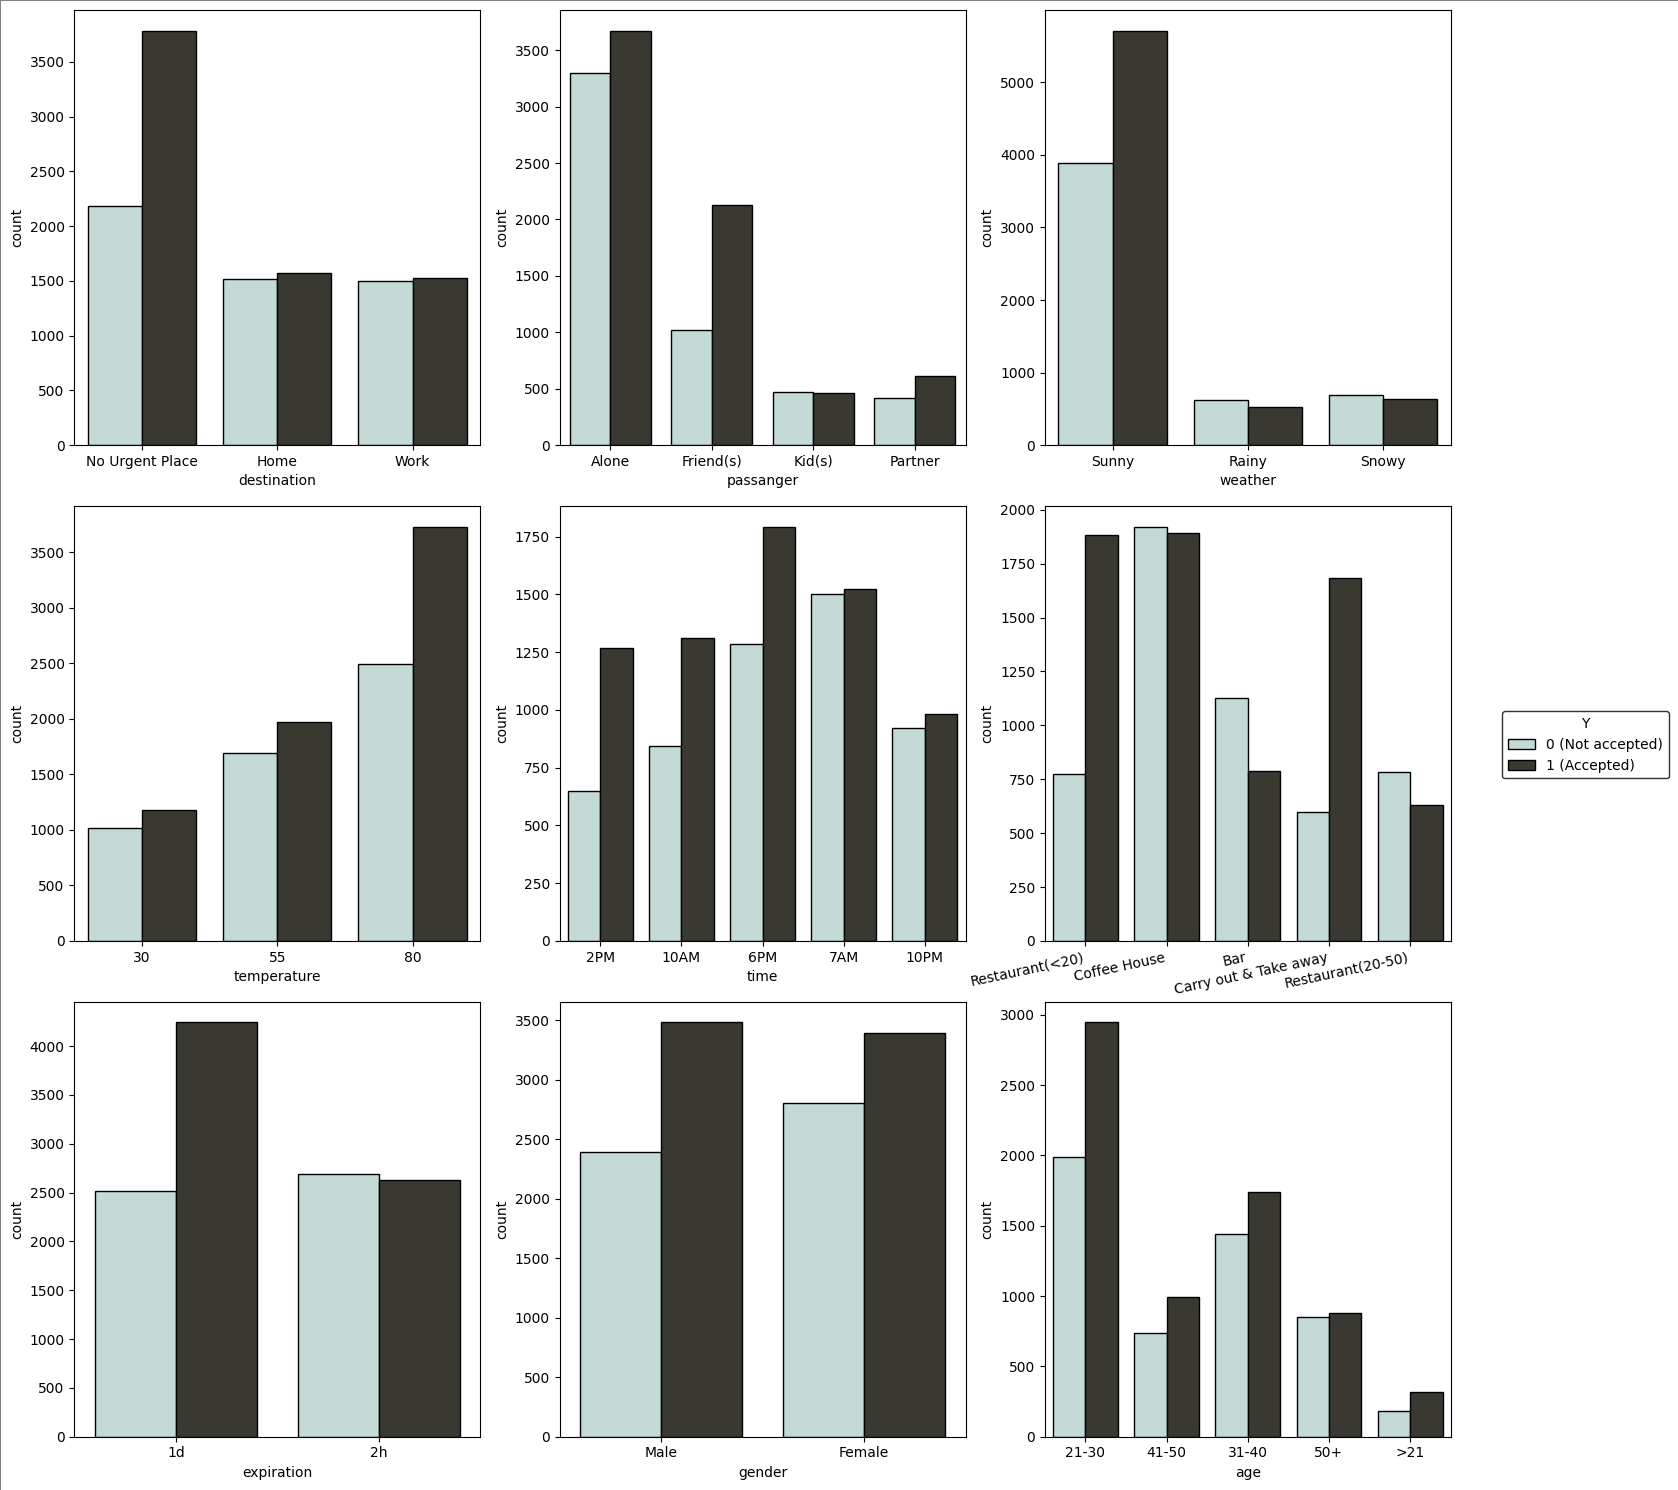

In [40]:
# distributions of features (visualization)

fig, axs = plt.subplots(3, 3, figsize=(15, 15))  

# plot 1
sns.countplot(data=df, x='destination', hue='Y',palette=['#c0ded9', '#3b3a30'], ax=axs[0,0], edgecolor='k', legend = False)

# plot 2
sns.countplot(data=df, x='passanger', hue='Y', palette=['#c0ded9', '#3b3a30'], ax=axs[0,1], edgecolor='k', legend = False)

# plot 3
sns.countplot(data=df, x='weather', hue='Y',palette=['#c0ded9', '#3b3a30'], ax=axs[0,2], edgecolor='k', legend = False)

# plot 4
sns.countplot(data=df, x='temperature', hue='Y',palette=['#c0ded9', '#3b3a30'], ax=axs[1,0], edgecolor='k', legend = False)

# plot 5
sns.countplot(data=df, x='time', hue='Y',palette=['#c0ded9', '#3b3a30'], ax=axs[1,1], edgecolor='k', legend = False)

# plot 6
sns.countplot(data=df, x='coupon', hue='Y',palette=['#c0ded9', '#3b3a30'], ax=axs[1,2], edgecolor='k', legend = False)

# plot 7
sns.countplot(data=df, x='expiration', hue='Y',palette=['#c0ded9', '#3b3a30'], ax=axs[2,0], edgecolor='k', legend = False)

# plot 8 
sns.countplot(data=df, x='gender', hue='Y',palette=['#c0ded9', '#3b3a30'], ax=axs[2,1], edgecolor='k', legend = False)

# plot 9
sns.countplot(data=df, x='age', hue='Y',palette=['#c0ded9', '#3b3a30'], ax=axs[2,2], edgecolor='k', legend = False)

fig.patch.set_edgecolor('grey')
fig.patch.set_linewidth(0.5)

fig.legend(labels=['0 (Not accepted)', '1 (Accepted)'],title="Y",loc='center left',bbox_to_anchor=(1.00, 0.5), ncol=1, edgecolor="k")

fig.tight_layout()

plt.setp(axs[1,2].get_xticklabels(), rotation=12, ha='right')

plt.show()

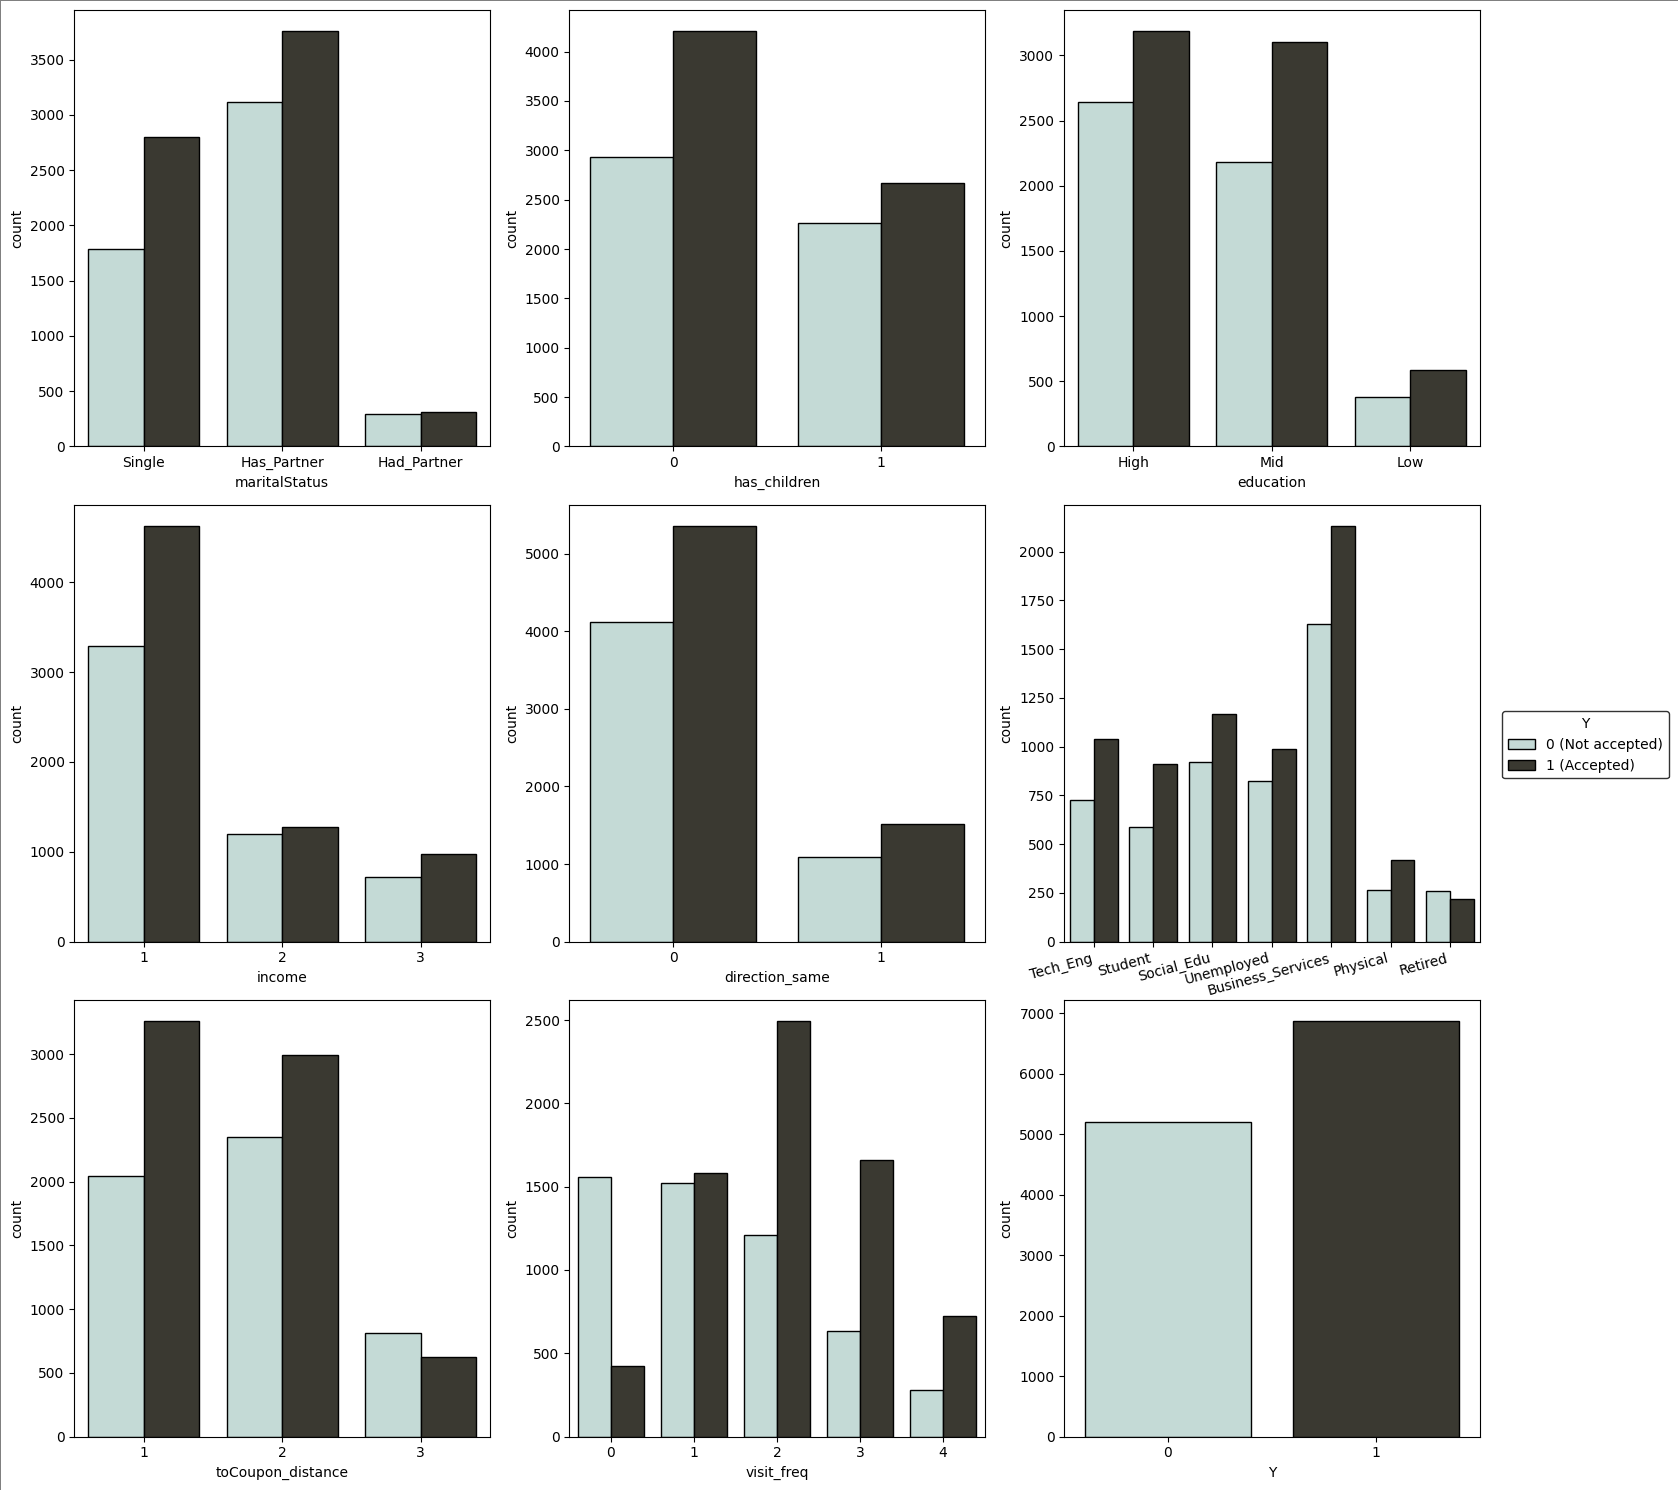

In [41]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))  

# plot 10
sns.countplot(data=df, x='maritalStatus', hue='Y',palette=['#c0ded9', '#3b3a30'], ax=axs[0,0], edgecolor='k', legend = False)

# plot 11
sns.countplot(data=df, x='has_children', hue='Y', palette=['#c0ded9', '#3b3a30'], ax=axs[0,1], edgecolor='k', legend = False)

# plot 12
sns.countplot(data=df, x='education', hue='Y',palette=['#c0ded9', '#3b3a30'], ax=axs[0,2], edgecolor='k', legend = False)

# plot 13
sns.countplot(data=df, x='income', hue='Y',palette=['#c0ded9', '#3b3a30'], ax=axs[1,0], edgecolor='k', legend = False)

# plot 14
sns.countplot(data=df, x='direction_same', hue='Y',palette=['#c0ded9', '#3b3a30'], ax=axs[1,1], edgecolor='k', legend = False)

# plot 15
sns.countplot(data=df, x='occupation_grouped', hue='Y',palette=['#c0ded9', '#3b3a30'], ax=axs[1,2], edgecolor='k', legend = False)

# plot 16
sns.countplot(data=df, x='toCoupon_distance', hue='Y',palette=['#c0ded9', '#3b3a30'], ax=axs[2,0], edgecolor='k', legend = False)

# plot 17
sns.countplot(data=df, x='visit_freq', hue='Y',palette=['#c0ded9', '#3b3a30'], ax=axs[2,1], edgecolor='k', legend = False)

# plot for Y (target variable)
sns.countplot(data=df, x='Y', hue = 'Y', palette=['#c0ded9', '#3b3a30'], ax=axs[2,2], edgecolor='k', legend = False)

fig.patch.set_edgecolor('grey')
fig.patch.set_linewidth(0.5)

fig.legend(labels=['0 (Not accepted)', '1 (Accepted)'],title="Y",loc='center left',bbox_to_anchor=(1.00, 0.5), ncol=1, edgecolor="k")

fig.tight_layout()

plt.setp(axs[1,2].get_xticklabels(), rotation=15, ha='right')
plt.show()

In [42]:
# checking the proportions of shares of individual feature categories depending on the value of Y.

cols = ['destination', 'passanger', 'weather', 'temperature', 'time','coupon', 'expiration', 'gender', 'age', 'maritalStatus',
        'has_children', 'education', 'income', 'direction_same','occupation_grouped', 'toCoupon_distance', 'visit_freq']

crosstabs = {}

for col in cols:
    ctab = pd.crosstab(df[col], df['Y'], normalize='index')
    crosstabs[col] = ctab

In [43]:
for col, ctab in crosstabs.items():
    print(f"\n=== {col} ===")
    print(ctab.round(2))


=== destination ===
Y                   0     1
destination                
Home             0.49  0.51
No Urgent Place  0.37  0.63
Work             0.50  0.50

=== passanger ===
Y             0     1
passanger            
Alone      0.47  0.53
Friend(s)  0.32  0.68
Kid(s)     0.50  0.50
Partner    0.41  0.59

=== weather ===
Y           0     1
weather            
Rainy    0.54  0.46
Snowy    0.52  0.48
Sunny    0.40  0.60

=== temperature ===
Y               0     1
temperature            
30           0.46  0.54
55           0.46  0.54
80           0.40  0.60

=== time ===
Y        0     1
time            
10AM  0.39  0.61
10PM  0.48  0.52
2PM   0.34  0.66
6PM   0.42  0.58
7AM   0.50  0.50

=== coupon ===
Y                         0     1
coupon                           
Bar                    0.59  0.41
Carry out & Take away  0.26  0.74
Coffee House           0.50  0.50
Restaurant(20-50)      0.55  0.45
Restaurant(<20)        0.29  0.71

=== expiration ===
Y              0     1


## First patterns in coupon acceptance behavior across different driver characteristics and contextual factors, identified based on EDA:

1. **`destination`** – drivers going `Home` or `Work` are less likely to accept a coupon compared to those without a specific destination (`No Urgent Place`).  

2. **`passenger`** – coupons are most often accepted by drivers traveling with `Friend(s)`, slightly less often by those traveling with a `Partner` or `Alone`, and least often by those traveling with `Kid(s)`.  

3. **`weather`** – acceptance is higher when the weather is `Sunny`, and lower when it is `Snowy` or `Rainy`

4. **`temperature`** – coupon acceptance rates are higher at `80°F`, and lower at `55°F` or `30°F`

5. **`time`** – coupons are most often accepted at `2PM`, followed by `10AM` and `6PM`; acceptance is lowest in the morning (`7AM`) and late evening (`10PM`)

6. **`expiration`** – coupons valid for 1 day (`1d`) are more likely to be accepted than those expiring in 2 hours (`2h`).  

7. **`coupon`** – the highest acceptance is for `Carry out & Take away` and `Restaurant(<20)`coupon types; lower acceptance is observed for `Coffee House`, `Restaurant(20-50)` and `Bar`
8. **`gender`** – `Male` drivers are slightly more likely to accept coupons than `Female` drivers  

9. **`age`** – younger drivers (`>21` or `21–30`) are the most likely to accept coupons, while drivers aged `50+` are least likely  

10. **`maritalStatus`** – singles (`Single`) are more likely to accept coupons compared to those who currently or previously had a partner (`Has_Partner` & `Had_Partner`)

11. **`has_children`** – drivers without children (`0`) are more likely to accept coupons than those with children (`1`)  

12. **`education`** – drivers with `Low` or `Mid` education levels accept coupons more often than those with `High` education  

13. **`income`** – the income group `2` stands out with higher acceptance compared to lower (`1`) and higher (`3`) income groups.
15. **`direction_same`** – the difference in acceptance depending on whether the trip direction matches the coupon location is marginal  

16. **`occupation_grouped`** – acceptance is highest among `Physical` workers and `Students`, and lowest among `Retired` people.  

17. **`toCoupon_distance`** – the shorter the distance to the coupon location, the higher the acceptance rate.  

18. **`visit_freq`** – only 21% of people who never visit a given place (`0`) accept coupons, compared to 72% among those visiting 4+ times a month (`3`& `4`).  


In [44]:
# Combining "Work" and "Home" categories (feature "occupation") into one category (similar acceptance % and category distribution)

# New feature: "urgent_destination"

df['urgent_destination'] = df['destination'].replace({
    'No Urgent Place': 'No',
    'Work':'Yes',
    'Home':'Yes'})

# Combining "Rainy" and "Snowy" categories (feature "weather") into one category (similar acceptance % and fewer observations than for "Sunny")

df['weather'] = df['weather'].replace({
    'Sunny': 'Good',
    'Rainy': 'Bad',
    'Snowy': 'Bad'})


# Combining "30" and "55" categories (feature "temperature") into one category (identical acceptance % and fewer observations than for "80")

df['temp_outside'] = df['temperature'].replace({
    30:'Cold',
    55: 'Cold',
    80: 'Warm'})

# Combining "visit_freq" = 4 and "visit_freq" = 3 into one category (identical acceptance %, previous "visit_freq" = 4 less numerous)

df['visit_freq'] = df['visit_freq'].replace({
    4:3})

In [45]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,income,direction_same,Y,occupation_grouped,toCoupon_distance,visit_freq,urgent_destination,temp_outside
22,No Urgent Place,Alone,Good,55,2PM,Restaurant(<20),1d,Male,21-30,Single,0,High,2,0,1,Tech_Eng,1,3,No,Cold
23,No Urgent Place,Friend(s),Good,80,10AM,Coffee House,2h,Male,21-30,Single,0,High,2,0,0,Tech_Eng,1,1,No,Warm
24,No Urgent Place,Friend(s),Good,80,10AM,Bar,1d,Male,21-30,Single,0,High,2,0,1,Tech_Eng,1,0,No,Warm
25,No Urgent Place,Friend(s),Good,80,10AM,Carry out & Take away,2h,Male,21-30,Single,0,High,2,0,0,Tech_Eng,2,3,No,Warm
26,No Urgent Place,Friend(s),Good,80,2PM,Coffee House,1d,Male,21-30,Single,0,High,2,0,0,Tech_Eng,1,1,No,Warm


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   destination         12079 non-null  object
 1   passanger           12079 non-null  object
 2   weather             12079 non-null  object
 3   temperature         12079 non-null  int64 
 4   time                12079 non-null  object
 5   coupon              12079 non-null  object
 6   expiration          12079 non-null  object
 7   gender              12079 non-null  object
 8   age                 12079 non-null  object
 9   maritalStatus       12079 non-null  object
 10  has_children        12079 non-null  int64 
 11  education           12079 non-null  object
 12  income              12079 non-null  int64 
 13  direction_same      12079 non-null  int64 
 14  Y                   12079 non-null  int64 
 15  occupation_grouped  12079 non-null  object
 16  toCoupon_distance   12079 

In [47]:
# Converting feature types to Categorical

for col in df.columns:
    df[col] = df[col].astype('category')

In [48]:
# Additional modifications for ordinal features 
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
df['time'] = pd.Categorical(df['time'], categories=time_order, ordered=True)

age_order = ['>21', '21-30', '31-40', '41-50', '50+']
df['age'] = pd.Categorical(df['age'], categories=age_order, ordered=True)

edu_order = ['Low', 'Mid', 'High']
df['education'] = pd.Categorical(df['education'], categories = edu_order, ordered = True)

income_order = [1, 2, 3]
df['income'] = pd.Categorical(df['income'], categories = income_order, ordered = True)

coupon_order = [1, 2, 3]
df['toCoupon_distance'] = pd.Categorical(df['toCoupon_distance'], categories = coupon_order, ordered = True)

visit_order = [0, 1, 2, 3]
df['visit_freq'] = pd.Categorical(df['visit_freq'], categories = visit_order, ordered = True)

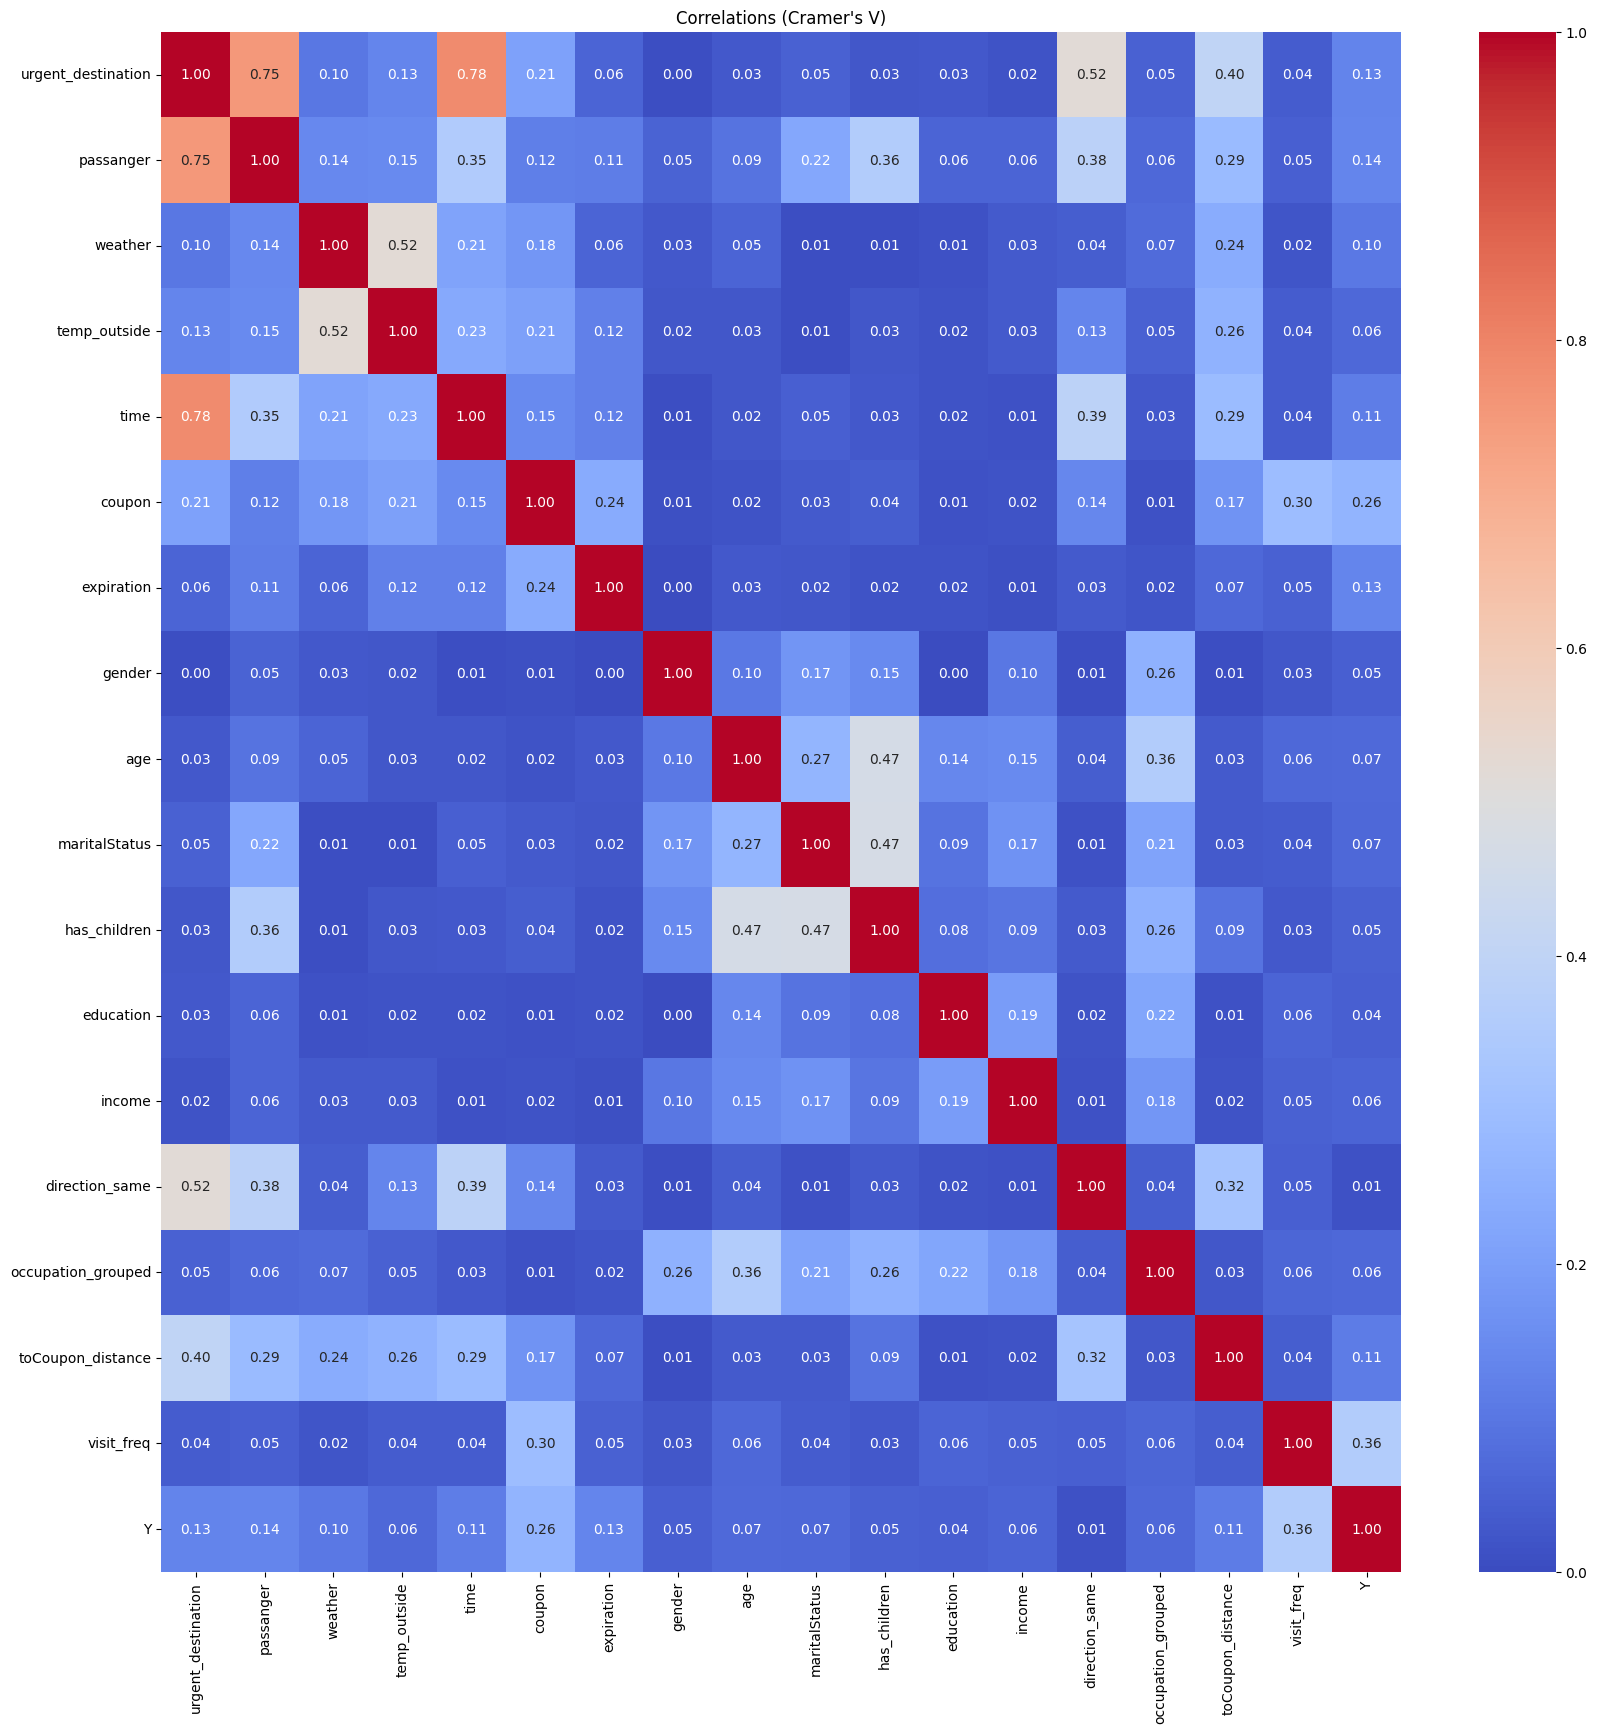

In [49]:
# Checking the correlation of categorical features (Cramer's V)

from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))


cat_vars = ['urgent_destination','passanger','weather','temp_outside','time','coupon','expiration','gender','age','maritalStatus',
            'has_children','education','income','direction_same','occupation_grouped','toCoupon_distance','visit_freq','Y']
    

cramers_matrix = pd.DataFrame(index=cat_vars, columns=cat_vars)

for var1 in cat_vars:
    for var2 in cat_vars:
        if var1 == var2:
            cramers_matrix.loc[var1, var2] = 1.0
        else:
            confusion = pd.crosstab(df[var1], df[var2])
            cramers_matrix.loc[var1, var2] = cramers_v(confusion)

cramers_matrix = cramers_matrix.astype(float)

# Visualization
plt.figure(figsize=(20, 20))
sns.heatmap(cramers_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1, fmt = ".2f")
plt.title("Correlations (Cramer's V)")
plt.show()

### Correlation analysis and removal of `urgent_destination`

Cramer’s V analysis revealed strong associations between `urgent_destination` and two other features:  
- `time` (V = 0.78)  
- `passenger` (V = 0.75)  

These correlations are intuitive:  
- At 7AM, drivers are mostly commuting to work, while afternoon and evening trips often mean returning home (after work)  
- Driving alone or with children is more often linked to a specific destination (work, school), while trips with friends are more leisure-oriented.  

Since `urgent_destination` largely overlaps with other features and introduces redundant collinearity (especially problematic for linear models such as logistic regression) it was **intentionally excluded from further modeling**.  


##  **4. Selection of Features for Further Analysis**

In [50]:
df.columns.tolist()

['destination',
 'passanger',
 'weather',
 'temperature',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'has_children',
 'education',
 'income',
 'direction_same',
 'Y',
 'occupation_grouped',
 'toCoupon_distance',
 'visit_freq',
 'urgent_destination',
 'temp_outside']

In [51]:
final_columns = ['Y','passanger','weather','time','coupon','expiration','gender','age','maritalStatus','has_children','education',
                 'income','direction_same','occupation_grouped','toCoupon_distance','visit_freq','temp_outside'] #'urgent_destination'


df_final = df[final_columns]

In [52]:
df_final.head()

,Y,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,has_children,education,income,direction_same,occupation_grouped,toCoupon_distance,visit_freq,temp_outside
22,1,Alone,Good,2PM,Restaurant(<20),1d,Male,21-30,Single,0,High,2,0,Tech_Eng,1,3,Cold
23,0,Friend(s),Good,10AM,Coffee House,2h,Male,21-30,Single,0,High,2,0,Tech_Eng,1,1,Warm
24,1,Friend(s),Good,10AM,Bar,1d,Male,21-30,Single,0,High,2,0,Tech_Eng,1,0,Warm
25,0,Friend(s),Good,10AM,Carry out & Take away,2h,Male,21-30,Single,0,High,2,0,Tech_Eng,2,3,Warm
26,0,Friend(s),Good,2PM,Coffee House,1d,Male,21-30,Single,0,High,2,0,Tech_Eng,1,1,Warm


In [53]:
df_final.to_csv("ready_data.csv")

In [54]:
df_final.shape

(12079, 17)

### After preprocessing and exploratory analysis, **17 variables (including target Y) were retained**. 
### The dataset is now ready for modeling.